## Initial Thoughts

So the Aim of this project is to explore the world happiness report from Kaggle that has data from 2015 to 2019 and use basic ML techniques for prediction.

I will build a prediction model, my first thought is on predicting the Happiness Score, but lets see after data exploration if thats the best Y value for prediction here.

This is the *[World Happiness Report Dataset](https://www.kaggle.com/datasets/unsdsn/world-happiness?resource=download)* on Kaggle.



### Investigate Data and decide how best to use ML techniques on this dataset. 

# Rough Plan

## Data Collection & Investigation
- [x] Data Collection / import + investigate what we have

## Data Cleaning
- [x] Data Cleaning pt 1 (only dealing with NaN or zero values)

## Data Preparation
- [x] Train/Test split - Seperate our Xtrain Xtest and Ytrain Ytest

## Data Visualization
- [x] Data Visualization (look for patterns and further cleaning, outliers, fillin data possiblities)

## Advanced Data Cleaning
- [ ] Data Cleaning pt 2 (filling in data values or adjusting outliers) - Planned for Iteration

## Final Data Check
- [x] Data Visualization (final check are we happy with our clean data)

## Exploratory Analysis
- [x] Exploratory Analysis (Correlations, trying to decide on features)

## Feature Engineering
- [ ] Feature engineering - decide on best features and/or make new features if needed

## Model Building
- [x] Model building
  - [x] Set a baseline with liner regression

## Model Validation
- [ ] Cross validate

## Model Iteration
- [ ] Iterate on Model - try some different models or adjust features to see if we can get a better outcome

## Pipeline Creation
- [ ] Pipeline - After our first setup we can then refactor some of our cleaning and feature engineering logic into a pipeline

Note: See Conclusion at the end of this Notebook. In the end after some exploration I found this dataset was not usable for a predictive model.


# Imports

In [678]:
import numpy as np
import pandas as pd
from IPython.display import display
import missingno as msno
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

## Assess All data files for similarity

Lets compare our files and years to see how much they differe in data structure.

In [679]:
# Put all your CSV filenames in a list
csv_files = [
    "./data/2015.csv",
    "./data/2016.csv",
    "./data/2017.csv",
    "./data/2018.csv",
    "./data/2019.csv"
]

# Read headers of the first file
base_headers = list(pd.read_csv(csv_files[0], nrows=1).columns)
print(f"Base headers (from {csv_files[0]}):\n{base_headers}\n")

# Compare against each other file
for file in csv_files[1:]:
    df = pd.read_csv(file, nrows=2)
    current_headers = list(df.columns)
    
    if current_headers == base_headers:
        print(f"✅ {file} matches the base headers.")
    else:
        print(f"❌ {file} has DIFFERENT headers:\n\n{current_headers}\n")
        display(df.head(2))
        # display(df.head(2).dtypes)



Base headers (from ./data/2015.csv):
['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Standard Error', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']

❌ ./data/2016.csv has DIFFERENT headers:

['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Lower Confidence Interval', 'Upper Confidence Interval', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']



,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463


❌ ./data/2017.csv has DIFFERENT headers:

['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high', 'Whisker.low', 'Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.', 'Freedom', 'Generosity', 'Trust..Government.Corruption.', 'Dystopia.Residual']



,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707


❌ ./data/2018.csv has DIFFERENT headers:

['Overall rank', 'Country or region', 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']



,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340


❌ ./data/2019.csv has DIFFERENT headers:

['Overall rank', 'Country or region', 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']



,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410


Our csv files appear to have different header naming and formats per year so Im going to work with 2016.csv first. It has more columns so perhaps will be a more interesting analysis.

# Import Data 

In [680]:
df = pd.read_csv('./data/2016.csv')

display(df.head())

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


# Intial Data Checks

In [681]:
df.describe()

,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,78.980892,5.382185,5.282395,5.481975,0.953880,0.793621,0.557619,0.370994,0.137624,0.242635,2.325807
std,45.466030,1.141674,1.148043,1.136493,0.412595,0.266706,0.229349,0.145507,0.111038,0.133756,0.542220
min,1.000000,2.905000,2.732000,3.078000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.817890
25%,40.000000,4.404000,4.327000,4.465000,0.670240,0.641840,0.382910,0.257480,0.061260,0.154570,2.031710
50%,79.000000,5.314000,5.237000,5.419000,1.027800,0.841420,0.596590,0.397470,0.105470,0.222450,2.290740
75%,118.000000,6.269000,6.154000,6.434000,1.279640,1.021520,0.729930,0.484530,0.175540,0.311850,2.664650
max,157.000000,7.526000,7.460000,7.669000,1.824270,1.183260,0.952770,0.608480,0.505210,0.819710,3.837720


Axes(0.125,0.11;0.698618x0.77)


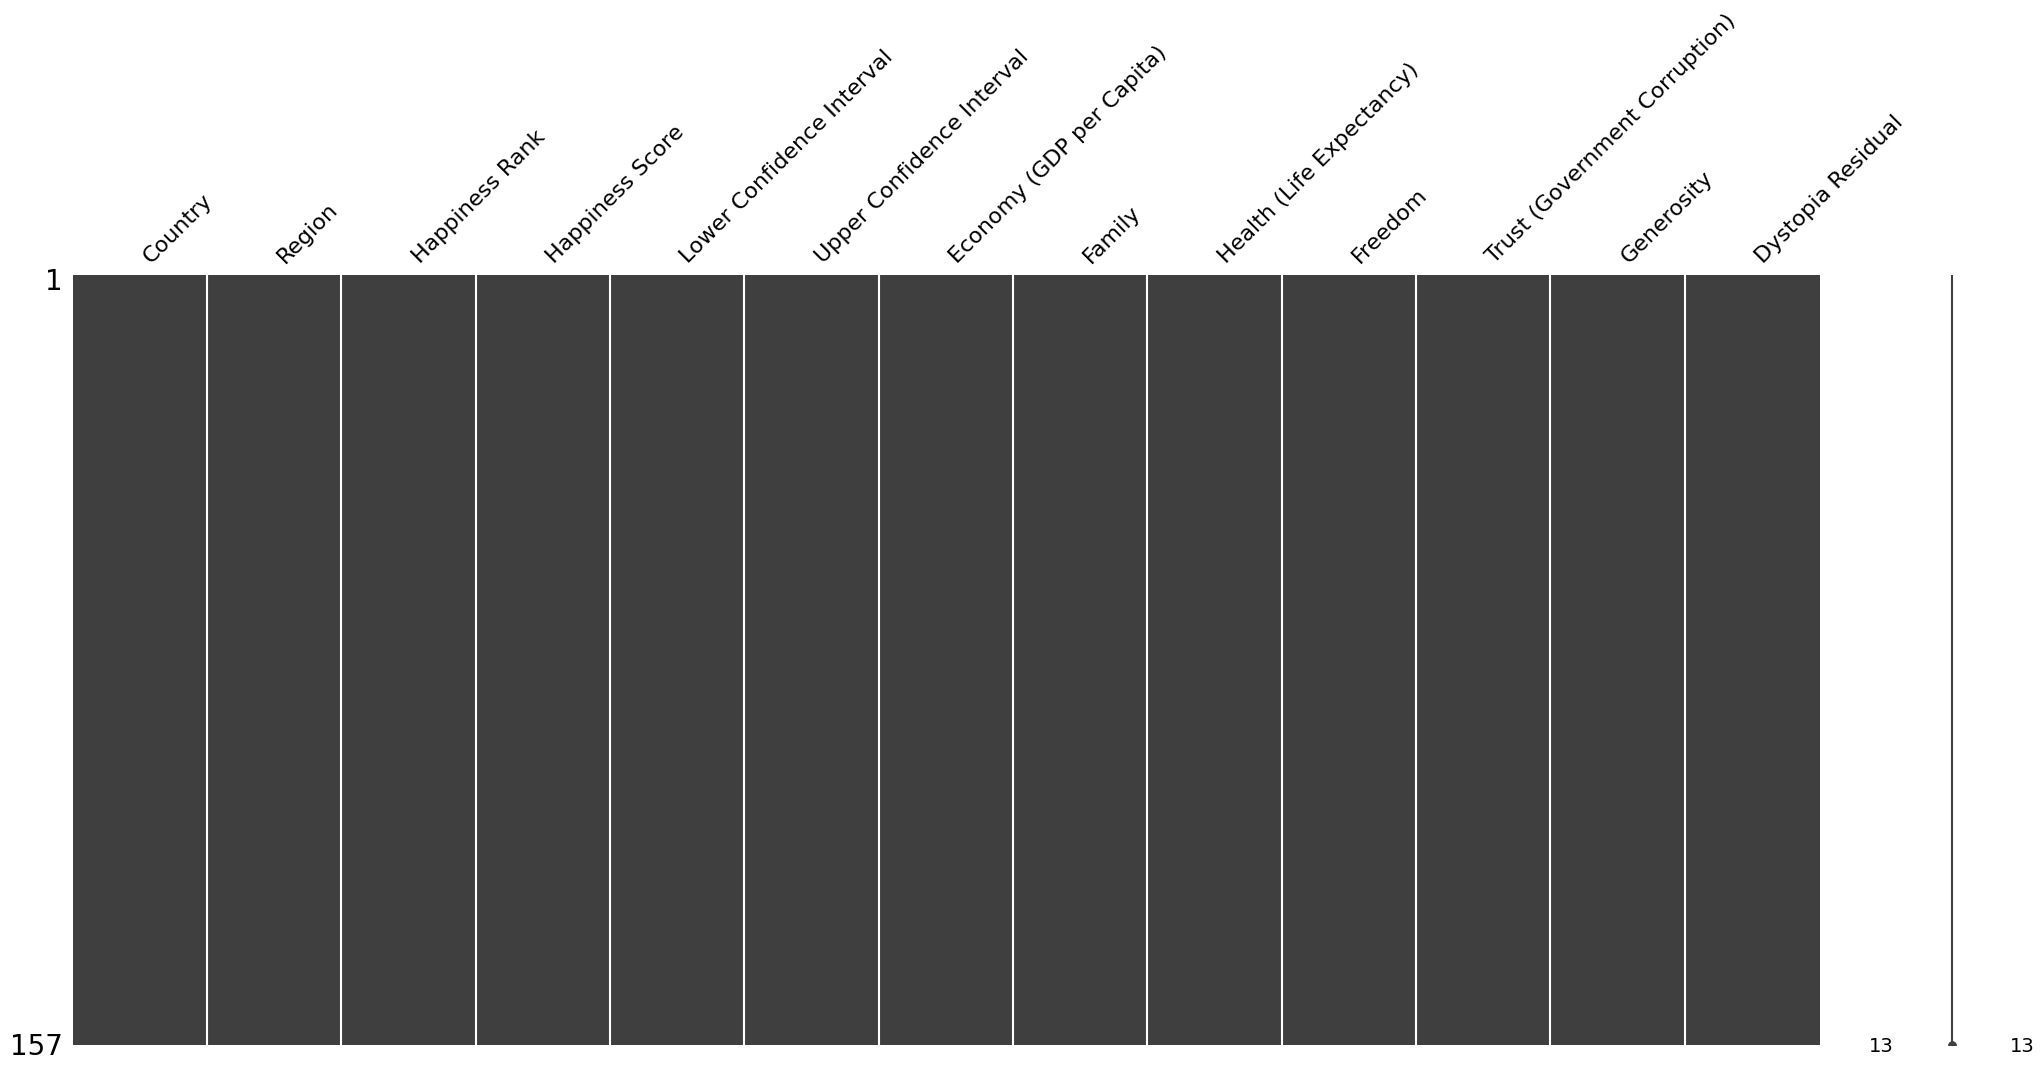

In [682]:
print(msno.matrix(df))

In [683]:
print(df.duplicated())
df.duplicated().unique()

0      False
1      False
2      False
3      False
4      False
       ...  
152    False
153    False
154    False
155    False
156    False
Length: 157, dtype: bool


array([False])

Looks like we have no duplicated rows.

In [684]:
df.shape

(157, 13)

In [685]:
df.isnull().sum()


Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Lower Confidence Interval        0
Upper Confidence Interval        0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

So far it looks like we have no null values and no missing values from our data. 

In [686]:
# Show all rows that contain zero data, as I think this is our data that needs cleaning.
df[(df == 0).any(axis=1)]

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
75,Somalia,Sub-Saharan Africa,76,5.440,5.321,5.559,0.00000,0.33613,0.11466,0.56778,0.31180,0.27225,3.83772
86,Bosnia and Herzegovina,Central and Eastern Europe,87,5.163,5.063,5.263,0.93383,0.64367,0.70766,0.09511,0.00000,0.29889,2.48406
98,Greece,Western Europe,99,5.033,4.935,5.131,1.24886,0.75473,0.80029,0.05822,0.04127,0.00000,2.12944
110,Sierra Leone,Sub-Saharan Africa,111,4.635,4.505,4.765,0.36485,0.62800,0.00000,0.30685,0.08196,0.23897,3.01402
132,Sudan,Sub-Saharan Africa,133,4.139,3.928,4.350,0.63069,0.81928,0.29759,0.00000,0.10039,0.18077,2.10995
154,Togo,Sub-Saharan Africa,155,3.303,3.192,3.414,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2.13540


On a Further check we do have some zero values in our data. Since there aren't that many I'm going to remove any rows that have zero values so we have a full dataset to work with.



# Clean Data - Pt I

In [687]:
# Lets remove rows with any zeros in them.
print(df.shape)
X = df[~(df == 0).any(axis=1)]
print(df.shape)

(157, 13)
(157, 13)


# Drop Columns

Lets Split our data and use Score as our predict value.

In [688]:
print(df.columns)
y = X['Happiness Score']
X = X.drop("Region", axis=1)
X = X.drop("Country", axis=1)
X = X.drop("Happiness Rank", axis=1)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')


# Data Visualization

I think it makes sense to look at correlations in the feature, perhaps we can work out what to remove or which features are most important for our baseline.

Happiness Score                  float64
Lower Confidence Interval        float64
Upper Confidence Interval        float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object


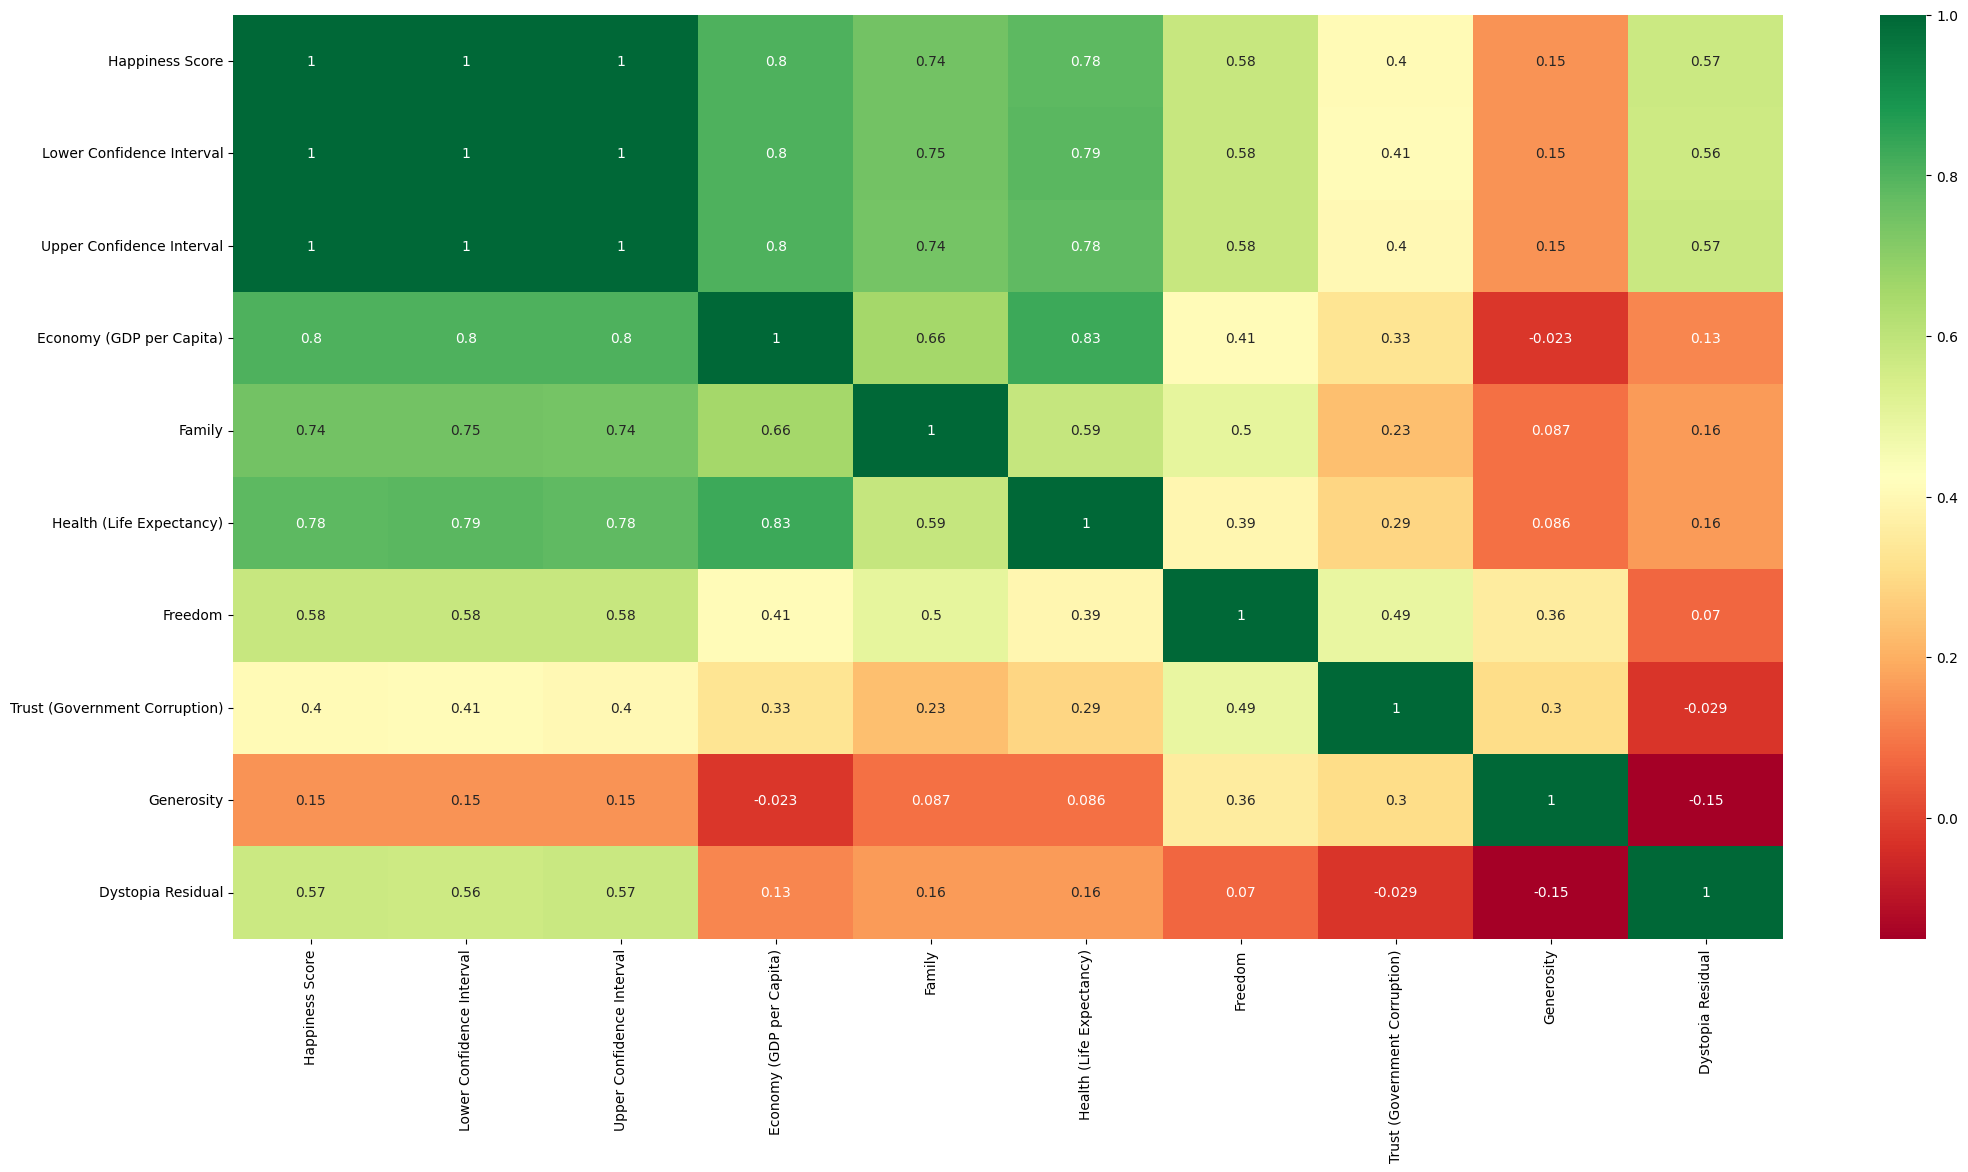

In [689]:
print(X.dtypes)

corrmat = X.corr()   # get correlations table
top_corr_features = corrmat.index
plt.figure(figsize=(25,12))

#plot heat map
g=sns.heatmap(X[top_corr_features].corr(),annot=True,cmap="RdYlGn")

After looking at correlations it seems it might be a good idea to drop Lower and Upper Confidence Iternval since they are a direct proxy to the score. This could cause data leakage and is also less interesting for our predictions.

In [690]:
X = X.drop("Upper Confidence Interval", axis=1)
X = X.drop("Lower Confidence Interval", axis=1)

# Distribution Assessment

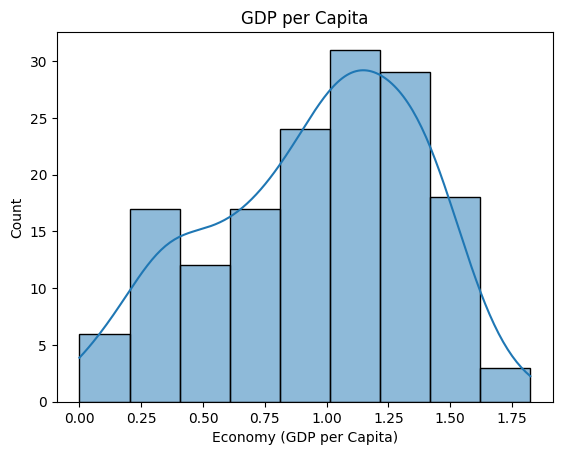

In [691]:
sns.histplot(df['Economy (GDP per Capita)'], kde=True)
plt.title('GDP per Capita')
plt.show()

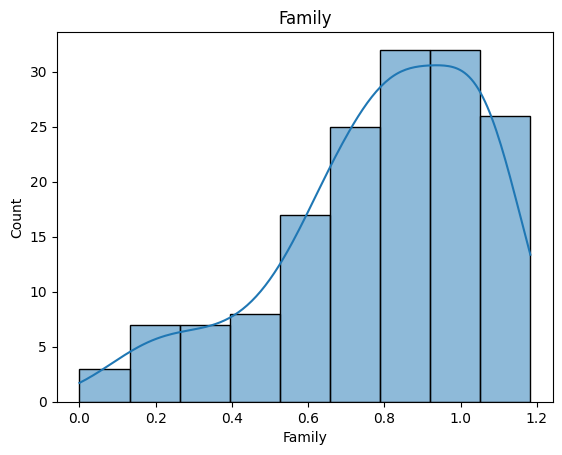

In [692]:
sns.histplot(df['Family'], kde=True)
plt.title('Family')
plt.show()

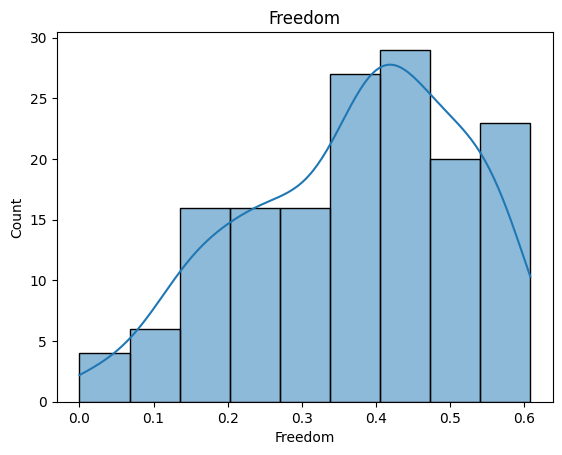

In [693]:
sns.histplot(df['Freedom'], kde=True)
plt.title('Freedom')
plt.show()

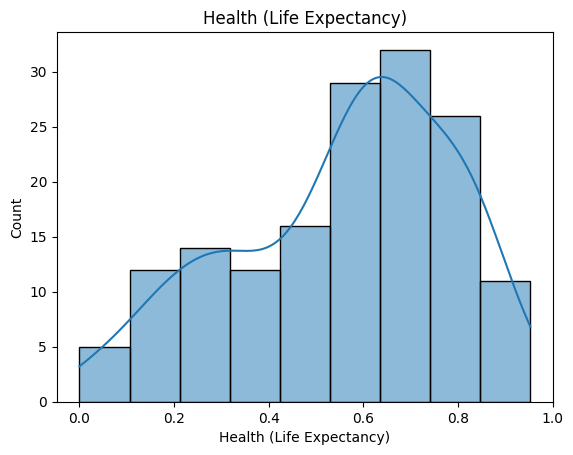

In [694]:
sns.histplot(df['Health (Life Expectancy)'], kde=True)
plt.title('Health (Life Expectancy)')
plt.show()

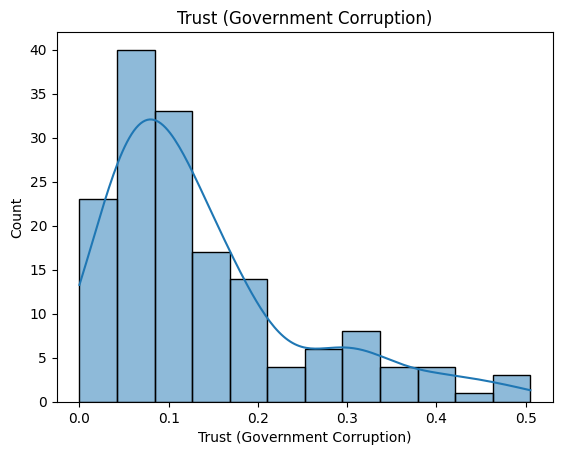

In [695]:
sns.histplot(df['Trust (Government Corruption)'], kde=True)
plt.title('Trust (Government Corruption)')
plt.show()

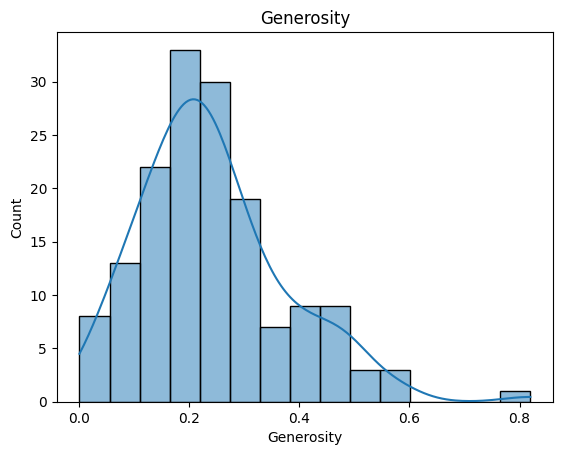

In [696]:
sns.histplot(df['Generosity'], kde=True)
plt.title('Generosity')
plt.show()

NB: Note for iteration. After getting our baseline it might be a good idea to remove outliers here from generosity to see the effect.

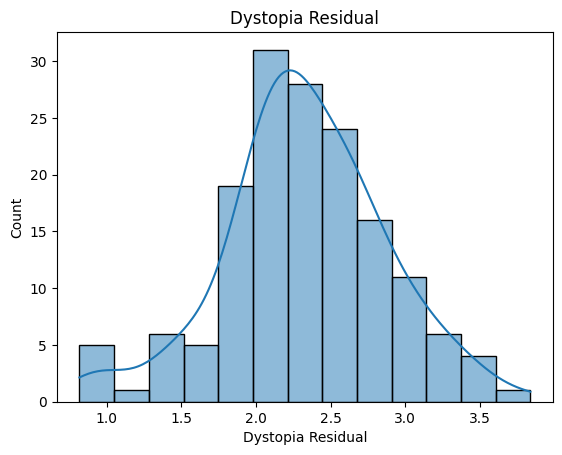

In [697]:
sns.histplot(df['Dystopia Residual'], kde=True)
plt.title('Dystopia Residual')
plt.show()

NB: It might be worth looking at the skewed distributions (Generosity, Trust, Health, Freedom, Family) after we get our baseline to see if it can improve our model.

In [698]:
# Load features to set a baseline 
my_features = ["Economy (GDP per Capita)", "Family", "Health (Life Expectancy)", "Freedom", "Trust (Government Corruption)", "Generosity", "Dystopia Residual", "Happiness Score"]

# It seems like dystopian residual is basically a comparison of the happiness score of a country to a baseline "imagery" dystopian country. It would not be available at the time of a new prediction.
# We must remove it for data leakage reasons.

# I also ran a linear regression including Dystopian Residual and it is close to 1 so I believe we MUST remove this feature.

# my_features = ["Economy (GDP per Capita)", "Family", "Health (Life Expectancy)", "Freedom", "Trust (Government Corruption)", "Generosity", "Happiness Score"]
X = X[my_features]

# Our Baseline Model

,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,0.968872,0.804084,0.565416,0.376631,0.138779,0.244554,2.314179
std,0.405146,0.260625,0.222780,0.140073,0.111345,0.134637,0.535027
min,0.056610,0.104190,0.038240,0.005890,0.003220,0.020250,0.817890
25%,0.689965,0.652800,0.403815,0.264915,0.061315,0.152340,1.995960
50%,1.030320,0.859740,0.607120,0.402120,0.106130,0.222450,2.290740
75%,1.289600,1.025405,0.730000,0.485335,0.176810,0.313700,2.660395
max,1.824270,1.183260,0.952770,0.608480,0.505210,0.819710,3.559060


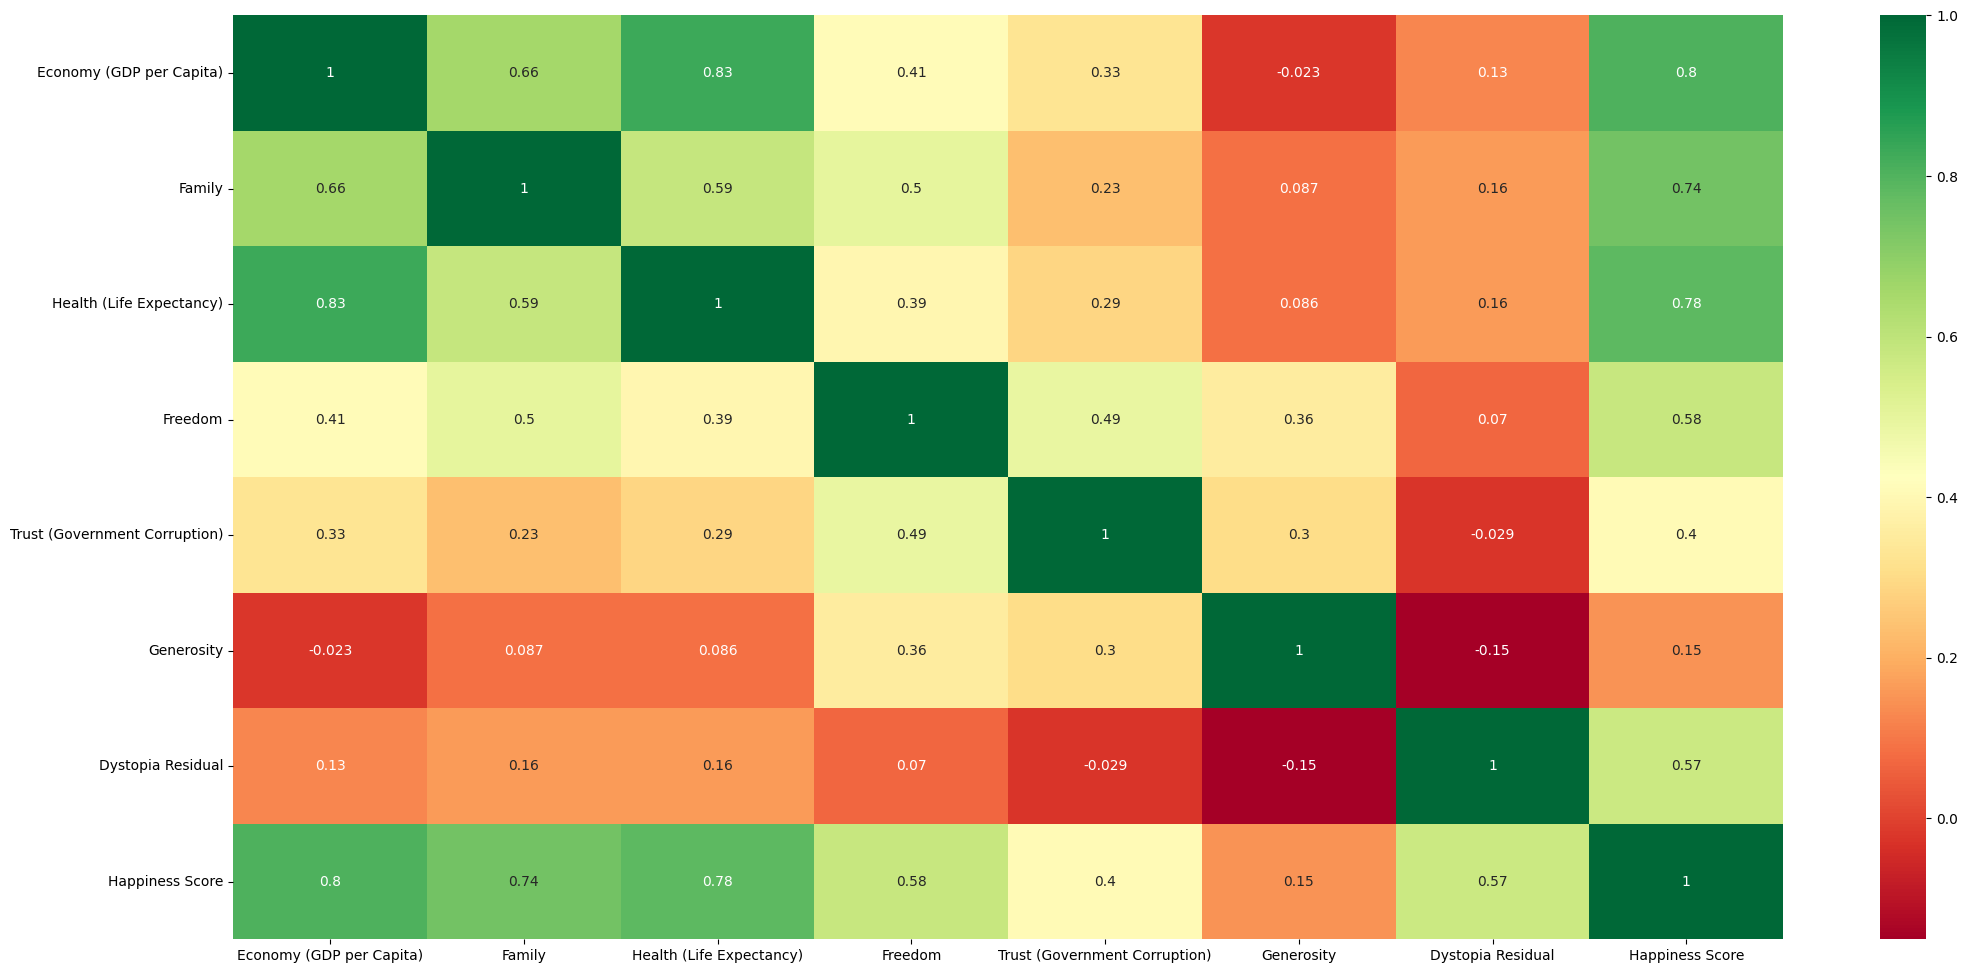

In [699]:
# Lets see our correlations again with the removed features.
corrmat = X.corr()   # get correlations table
top_corr_features = corrmat.index
plt.figure(figsize=(25,12))
g=sns.heatmap(X[top_corr_features].corr(),annot=True,cmap="RdYlGn")

# Drop Happiness score, we need this for our correlation chart, but not in the model for X.
X = X.drop('Happiness Score', axis=1)
display(X.describe())

In [700]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

#Train on full data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

preds = linear_model.predict(X_test)


print(mean_absolute_error(y_test, preds))
print(linear_model.score(X_train, y_train))


0.00022743778521616204
0.999999932752281


0.99 Is supsciously high score. After further looking into the dataset documentation I realised that most of the columns were direct data comparisons to the happiness score. Making this Dataset not useful for a predictive model. So I decided to stop here to find a different data set for a different learning project.

# Finding a Problem and Conclusion

## Key Learning: Data Leakage Discovery

### Initial Approach
- Attempted to predict Happiness Score using economic, social, and political factors
- Achieved suspiciously high score (0.99) with minimal error

### Investigation and Discovery
- Upon closer examination of the data documentation, discovered that all predictor variables were "contributions to the calculation of the Happiness Score"
- This created severe data leakage - essentially trying to predict a sum using its components
- The Dystopia Residual was particularly problematic as it represents the unexplained variance in the happiness calculation

### Conclusion
This dataset is designed for **explanatory analysis** (understanding what factors contribute to happiness differences) rather than **predictive modeling**. 

**Key Takeaway:** Always investigate data sources and variable definitions before modeling. High performance metrics can indicate data leakage rather than model success.